In [1]:
conda install pulp

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
from pulp import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
prob = LpProblem("SimpleProblem",LpMinimize)

In [5]:
x1 = LpVariable("x1",0)
x2 = LpVariable("x2",0)

In [6]:
prob += 60*x1 +40*x2

In [7]:
prob += 4*x2 +4*x2 >= 10
prob += 2*x1 +x2>=4
prob += 6*x1 +2*x2 <=12 

In [8]:
prob.solve()

1

In [9]:
print("Status:",LpStatus[prob.status])

Status: Optimal


In [10]:
for v in prob.variables():
    print(v.name,"=",v.varValue)

x1 = 1.375
x2 = 1.25


In [11]:
print("The optimal value of the objective function is =", value(prob.objective))

The optimal value of the objective function is = 132.5


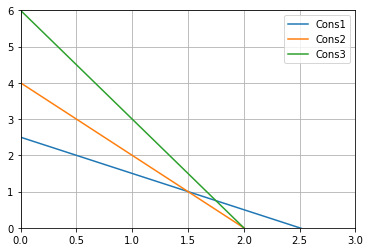

In [12]:
x = np.arange(0,4)
plt.plot(x,2.5-x,label= "Cons1")
plt.plot(x,4-2*x,label= "Cons2")
plt.plot(x,6-3*x,label= "Cons3")
plt.axis([0,3,0,6])
plt.grid(True)
plt.legend()
plt.show()

#transportation

In [13]:
prob1 = LpProblem("Trans",LpMinimize)

In [14]:
Branch = ["A","B","C","D"]
Warehouse =[1,2,3,4]

In [15]:
supply = {"A":35,"B":50,"C":80,"D":65}
demand = {1:70,2:30,3:75,4:55}
Cost = {"A":{1:10,2:7,3:6,4:4},
       "B":{1:8,2:8,3:5,4:7},
       "C":{1:4,2:3,3:6,4:9},
       "D":{1:7,2:5,3:4,4:3},
       }

In [16]:
routes =[(i,j) for i in Branch for j in Warehouse]

In [17]:
amount_vars = LpVariable.dicts("Amountship",(Branch,Warehouse),0)

In [18]:
prob1 += lpSum(amount_vars[i][j]*Cost[i][j] for (i,j) in routes) 

In [19]:
for j in Warehouse:
    prob1 += lpSum(amount_vars[i][j] for i in Branch) >=demand[j]
for i in Branch:
    prob1 += lpSum(amount_vars[i][j] for j in Warehouse) <= supply[i]

In [40]:
prob1

Trans:
MINIMIZE
10*Amountship_A_1 + 7*Amountship_A_2 + 6*Amountship_A_3 + 4*Amountship_A_4 + 8*Amountship_B_1 + 8*Amountship_B_2 + 5*Amountship_B_3 + 7*Amountship_B_4 + 4*Amountship_C_1 + 3*Amountship_C_2 + 6*Amountship_C_3 + 9*Amountship_C_4 + 7*Amountship_D_1 + 5*Amountship_D_2 + 4*Amountship_D_3 + 3*Amountship_D_4 + 0
SUBJECT TO
_C1: Amountship_A_1 + Amountship_B_1 + Amountship_C_1 + Amountship_D_1 >= 70

_C2: Amountship_A_2 + Amountship_B_2 + Amountship_C_2 + Amountship_D_2 >= 30

_C3: Amountship_A_3 + Amountship_B_3 + Amountship_C_3 + Amountship_D_3 >= 75

_C4: Amountship_A_4 + Amountship_B_4 + Amountship_C_4 + Amountship_D_4 >= 55

_C5: Amountship_A_1 + Amountship_A_2 + Amountship_A_3 + Amountship_A_4 <= 35

_C6: Amountship_B_1 + Amountship_B_2 + Amountship_B_3 + Amountship_B_4 <= 50

_C7: Amountship_C_1 + Amountship_C_2 + Amountship_C_3 + Amountship_C_4 <= 80

_C8: Amountship_D_1 + Amountship_D_2 + Amountship_D_3 + Amountship_D_4 <= 65

VARIABLES
Amountship_A_1 Continuous
Amount

In [20]:
prob1.solve()

1

In [21]:
print("Status:",LpStatus[prob1.status])

Status: Optimal


In [22]:
for v in prob1.variables():
    if v.varValue >0:
        print(v.name,"=",v.varValue)

Amountship_A_4 = 35.0
Amountship_B_3 = 50.0
Amountship_C_1 = 70.0
Amountship_C_2 = 10.0
Amountship_D_2 = 20.0
Amountship_D_3 = 25.0
Amountship_D_4 = 20.0


In [23]:
print("The optimal value of the objective function is =", value(prob1.objective))

The optimal value of the objective function is = 960.0


##Plant Location

In [24]:
Customer = [1,2,3,4,5]
Facility = ["A","B","C"]

In [25]:
Demand = {1: 80,2: 270,3: 250,4: 160,5: 180}
MaxSupply = {"A":500,"B":500,"C":500}
Fixedcost = {"A":1000,"B":1000,"C":1000}
Trans_cost = {"A":{1:4,2:5,3:6,4:8,5:10},
             "B":{1:6,2:4,3:3,4:5,5:8},
             "C":{1:9,2:7,3:4,4:3,5:4},
             }

In [26]:
prob2 = LpProblem("Plantloc",LpMinimize)

In [27]:
use_facility = LpVariable.dicts("Use Facility",Facility,0,1,LpBinary)
ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility],0)

In [28]:
prob2 += (lpSum(Fixedcost[j]*use_facility[j] for j in Facility)+
         lpSum(Trans_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer))

In [29]:
for i in Customer:
    prob2 += lpSum(ser_customer[(i,j)]  for j in Facility) == Demand[i]
for j in Facility:
    prob2 += lpSum(ser_customer[(i,j)]  for i in Customer) <= MaxSupply[j]*use_facility[j]
for i in Customer:
    for j in Facility:
        prob2 += ser_customer[(i,j)] <= Demand[i]*use_facility[j]

In [30]:
prob2

Plantloc:
MINIMIZE
4*Service_(1,_'A') + 6*Service_(1,_'B') + 9*Service_(1,_'C') + 5*Service_(2,_'A') + 4*Service_(2,_'B') + 7*Service_(2,_'C') + 6*Service_(3,_'A') + 3*Service_(3,_'B') + 4*Service_(3,_'C') + 8*Service_(4,_'A') + 5*Service_(4,_'B') + 3*Service_(4,_'C') + 10*Service_(5,_'A') + 8*Service_(5,_'B') + 4*Service_(5,_'C') + 1000*Use_Facility_A + 1000*Use_Facility_B + 1000*Use_Facility_C + 0
SUBJECT TO
_C1: Service_(1,_'A') + Service_(1,_'B') + Service_(1,_'C') = 80

_C2: Service_(2,_'A') + Service_(2,_'B') + Service_(2,_'C') = 270

_C3: Service_(3,_'A') + Service_(3,_'B') + Service_(3,_'C') = 250

_C4: Service_(4,_'A') + Service_(4,_'B') + Service_(4,_'C') = 160

_C5: Service_(5,_'A') + Service_(5,_'B') + Service_(5,_'C') = 180

_C6: Service_(1,_'A') + Service_(2,_'A') + Service_(3,_'A') + Service_(4,_'A')
 + Service_(5,_'A') - 500 Use_Facility_A <= 0

_C7: Service_(1,_'B') + Service_(2,_'B') + Service_(3,_'B') + Service_(4,_'B')
 + Service_(5,_'B') - 500 Use_Facility_B <= 0



In [31]:
prob2.solve()

1

In [32]:
print("Status:",LpStatus[prob1.status])

Status: Optimal


In [33]:
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Establish Facility at site = ", j)

Establish Facility at site =  B
Establish Facility at site =  C


In [34]:
for v in prob2.variables():
    print(v.name, "=", v.varValue)

Service_(1,_'A') = 0.0
Service_(1,_'B') = 80.0
Service_(1,_'C') = 0.0
Service_(2,_'A') = 0.0
Service_(2,_'B') = 270.0
Service_(2,_'C') = 0.0
Service_(3,_'A') = 0.0
Service_(3,_'B') = 150.0
Service_(3,_'C') = 100.0
Service_(4,_'A') = 0.0
Service_(4,_'B') = 0.0
Service_(4,_'C') = 160.0
Service_(5,_'A') = 0.0
Service_(5,_'B') = 0.0
Service_(5,_'C') = 180.0
Use_Facility_A = 0.0
Use_Facility_B = 1.0
Use_Facility_C = 1.0


In [35]:
for v in prob2.variables():
    if v.varValue >0:
        print(v.name, "=", v.varValue)

Service_(1,_'B') = 80.0
Service_(2,_'B') = 270.0
Service_(3,_'B') = 150.0
Service_(3,_'C') = 100.0
Service_(4,_'C') = 160.0
Service_(5,_'C') = 180.0
Use_Facility_B = 1.0
Use_Facility_C = 1.0


In [36]:
print("The optimal value of the objective function is =", value(prob2.objective))

The optimal value of the objective function is = 5610.0


In [37]:
import pandas as pd

In [38]:
Data = pd.read_csv("C:/Users/Gaula/Downloads/house_data.csv")

In [39]:
Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
